<a href="https://colab.research.google.com/github/MonkeyDMemo/AutomataCellular/blob/main/s3_%26_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install awscli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 4.0 MB/s 
     |████████████████████████████████| 548 kB 47.7 MB/s 
     |████████████████████████████████| 662 kB 67.2 MB/s 
     |████████████████████████████████| 79 kB 7.5 MB/s 
     |████████████████████████████████| 10.3 MB 29.5 MB/s 
     |████████████████████████████████| 140 kB 60.6 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
  Attempting uninstall: docutils
    Found existing installation: docutils 0.17.1
    Uninstalling docutils-0.17.1:


In [4]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [6]:
!aws configure


AWS Access Key ID [****************Y67F]: 
AWS Secret Access Key [****************VmPO]: 
Default region name [us-east-1]: 
Default output format [None]: 


In [7]:
!pip install boto3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 132 kB 4.4 MB/s 


In [8]:
!pip install s3fs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 66 kB 2.9 MB/s 
     |████████████████████████████████| 9.1 MB 31.7 MB/s 
  Attempting uninstall: botocore
    Found existing installation: botocore 1.29.33
    Uninstalling botocore-1.29.33:
      Successfully uninstalled botocore-1.29.33
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
boto3 1.26.33 requires botocore<1.30.0,>=1.29.33, but you have botocore 1.27.59 which is incompatible.
awscli 1.27.33 requires botocore==1.29.33, but you have botocore 1.27.59 which is incompatible.


In [24]:
import numpy as np   
import pandas as pd 

#Visualization
import matplotlib.pyplot as plt 
import seaborn as sns     

#funciones específicas de Sckit-learn 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
#para exportar el gráfico como archivo.dot
from sklearn.tree import export_graphviz  

#para visualizar el arbol desde el formato .dot
from IPython.display import Image
from pydotplus import graph_from_dot_data

In [9]:
import boto3
import pandas as pd

# Create an S3 client
s3 = boto3.client("s3")
#path='s3://dbttp/dataset_bryan/datset_global.csv'
path='s3://data-lake-tp/correos/202211/correos_202211.csv000.gz'
df = pd.read_csv(path, compression="gzip",sep ="|")#,dtype={'cuenta':str})
#df = pd.read_csv(path,sep="|")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
df

,subscriberkey,correos_enviados,links_abiertos,clicks_dados,target
0,0108288303,75,15,2,ALCANZADO
1,aparicio_oswaldo@hotmail.com,38,39,1,ALCANZADO
2,0106770773,121,26,1,ALCANZADO
3,mxswed@hotmail.com,55,54,1,ALCANZADO
4,0105153587,104,98,3,ALCANZADO
...,...,...,...,...,...
7248171,0114413867,1,0,0,NaN
7248172,0109360861,1,0,0,NaN
7248173,0114423585,1,0,0,NaN
7248174,0108163488,1,0,0,NaN


In [11]:
df.nunique()

subscriberkey       7248176
correos_enviados        247
links_abiertos          258
clicks_dados            121
target                    1
dtype: int64

In [12]:
df = df.set_index('subscriberkey')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7248176 entries, 0108288303 to 0114345751
Data columns (total 4 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   correos_enviados  int64 
 1   links_abiertos    int64 
 2   clicks_dados      int64 
 3   target            object
dtypes: int64(3), object(1)
memory usage: 276.5+ MB


In [14]:
df_obj = df.select_dtypes("object")  

for col in df_obj.columns:
    print (col)
    print (df[col].value_counts(),'\n')

target
ALCANZADO    1468929
Name: target, dtype: int64 



In [15]:
df['target'] = df['target'].map({'ALCANZADO': 1})

In [16]:
df

,correos_enviados,links_abiertos,clicks_dados,target
subscriberkey,,,,
0108288303,75,15,2,1.0
aparicio_oswaldo@hotmail.com,38,39,1,1.0
0106770773,121,26,1,1.0
mxswed@hotmail.com,55,54,1,1.0
0105153587,104,98,3,1.0
...,...,...,...,...
0114413867,1,0,0,NaN
0109360861,1,0,0,NaN
0114423585,1,0,0,NaN


In [17]:
df = df.fillna(value=0)

In [18]:
df

,correos_enviados,links_abiertos,clicks_dados,target
subscriberkey,,,,
0108288303,75,15,2,1.0
aparicio_oswaldo@hotmail.com,38,39,1,1.0
0106770773,121,26,1,1.0
mxswed@hotmail.com,55,54,1,1.0
0105153587,104,98,3,1.0
...,...,...,...,...
0114413867,1,0,0,0.0
0109360861,1,0,0,0.0
0114423585,1,0,0,0.0


In [19]:
df['target'] = df['target'].astype(int)

In [20]:
df = pd.get_dummies(df)
print(df.shape, '\n', df.columns)

(7248176, 4) 
 Index(['correos_enviados', 'links_abiertos', 'clicks_dados', 'target'], dtype='object')


In [22]:
def correlacion(dataframe, grafica=True, matrix=False):
    '''Devuelve la matriz de correlación de un dataframe
    y sí grafica=True, muestra un mapa de calor de la matriz de correlación'''
    corr=dataframe.corr()                   
    if grafica==True:
      fig = plt.figure(figsize = (25, 20))
      ax = sns.heatmap(corr,
                       vmin = -1,
                       vmax = 1,
                       center = 0,
                       cmap = "coolwarm", 
                       annot = True,
                       fmt=".2f",
                       square = True)
      ax.set_xticklabels(ax.get_xticklabels(), 
                         rotation = 45,
                         horizontalalignment ='right')
    if matrix==True:
      return corr

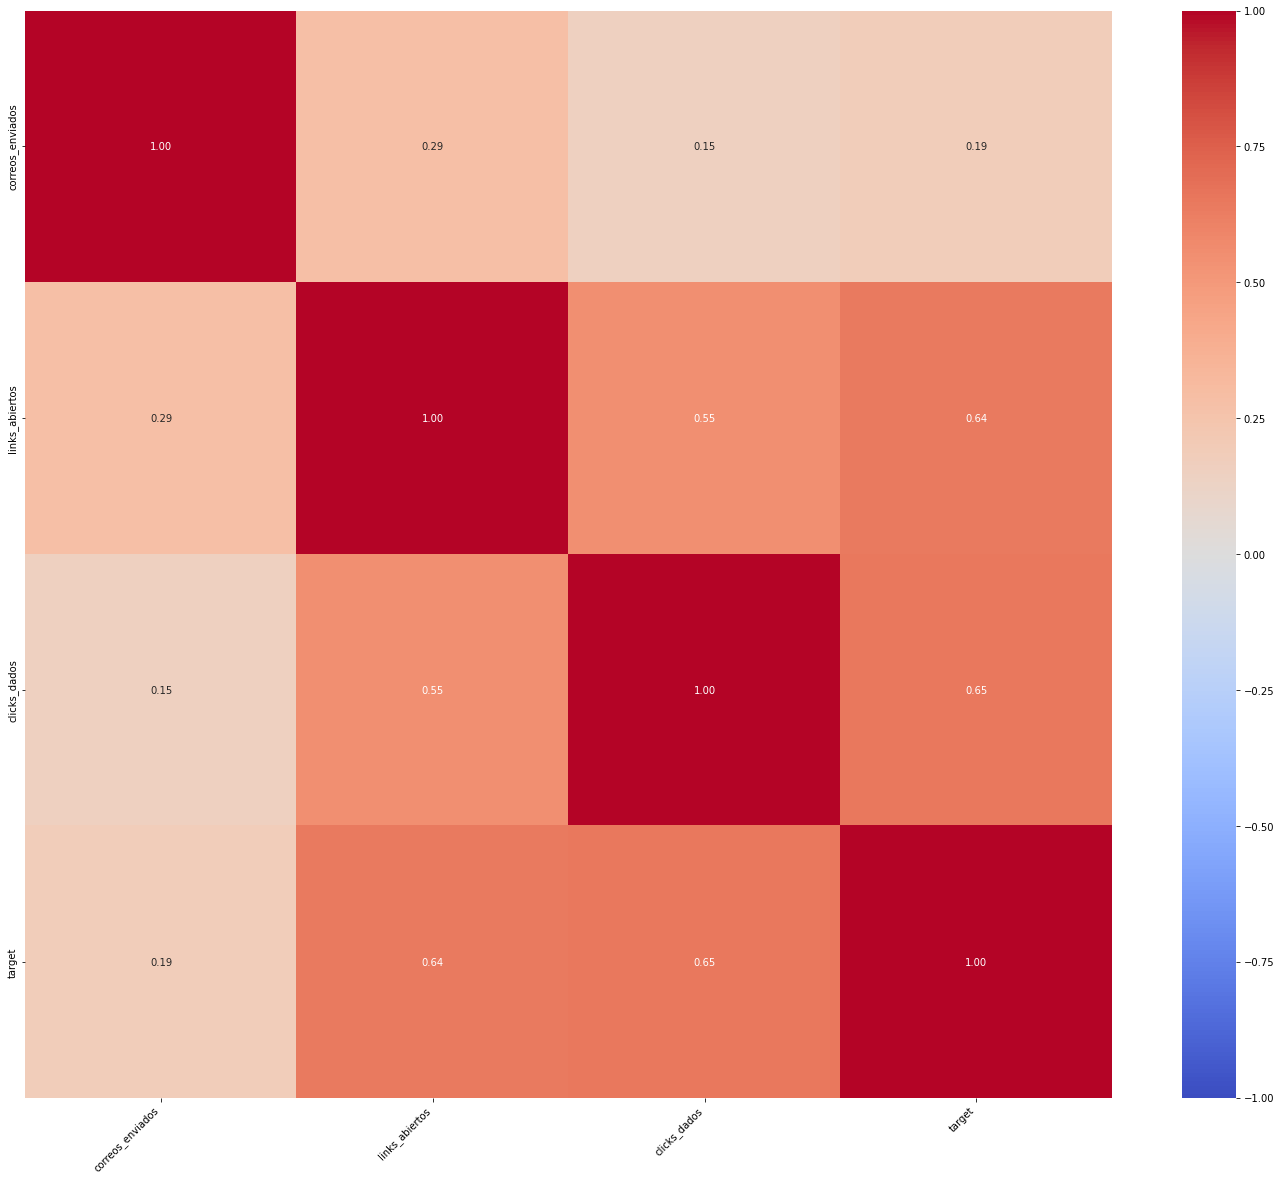

In [25]:
corr_matrix = correlacion(df, grafica=True, matrix=True)

In [ ]:
from mapsmx import MapsMX
import plotly.express as px
import geopandas


In [ ]:
!pip install mapsmx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46.9 MB 42 kB/s 
     |████████████████████████████████| 1.1 MB 50.6 MB/s 
     |████████████████████████████████| 7.8 MB 51.2 MB/s 
     |████████████████████████████████| 16.6 MB 215 kB/s 


In [ ]:
muns_w_centroids = MapsMX().get_geo('municipality', add_centroids=True)

muns_w_centroids


NameError: ignored

In [ ]:
df1 = muns_w_centroids[['cve_geo_mun', 'geometry_mun']]

json_string=df1.to_json('')

In [ ]:
print(json_string)

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')